In [204]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
import warnings
warnings.filterwarnings('ignore')

In [206]:
df = pd.read_csv('disease.csv', encoding='ISO-8859-1')


In [207]:
df.head()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
4,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive


In [208]:
df.tail()

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
344,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
346,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive
347,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive
348,Stroke,Yes,No,Yes,No,90,Female,High,High,Positive


In [209]:
df.shape

(349, 10)

In [210]:
df.columns

Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Age',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

In [211]:
df.duplicated().sum()

49

In [212]:
df=df.drop_duplicates()
df

,Disease,Fever,Cough,Fatigue,Difficulty Breathing,Age,Gender,Blood Pressure,Cholesterol Level,Outcome Variable
0,Influenza,Yes,No,Yes,Yes,19,Female,Low,Normal,Positive
1,Common Cold,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
2,Eczema,No,Yes,Yes,No,25,Female,Normal,Normal,Negative
3,Asthma,Yes,Yes,No,Yes,25,Male,Normal,Normal,Positive
5,Eczema,Yes,No,No,No,25,Female,Normal,Normal,Positive
...,...,...,...,...,...,...,...,...,...,...
341,Tonsillitis,Yes,Yes,Yes,No,70,Female,High,High,Positive
342,Williams Syndrome,No,No,Yes,No,70,Female,Normal,Normal,Positive
343,Stroke,Yes,No,Yes,No,80,Female,High,High,Positive
345,Stroke,Yes,No,Yes,No,85,Male,High,High,Positive


In [213]:
df.duplicated().sum()

0

In [214]:
df.shape

(300, 10)

In [215]:
df.isnull().sum()

Disease                 0
Fever                   0
Cough                   0
Fatigue                 0
Difficulty Breathing    0
Age                     0
Gender                  0
Blood Pressure          0
Cholesterol Level       0
Outcome Variable        0
dtype: int64

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 0 to 347
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Disease               300 non-null    object
 1   Fever                 300 non-null    object
 2   Cough                 300 non-null    object
 3   Fatigue               300 non-null    object
 4   Difficulty Breathing  300 non-null    object
 5   Age                   300 non-null    int64 
 6   Gender                300 non-null    object
 7   Blood Pressure        300 non-null    object
 8   Cholesterol Level     300 non-null    object
 9   Outcome Variable      300 non-null    object
dtypes: int64(1), object(9)
memory usage: 25.8+ KB


In [217]:
df.describe()

,Age
count,300.000000
mean,45.756667
std,12.596548
min,19.000000
25%,35.000000
50%,45.000000
75%,55.000000
max,90.000000


In [218]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['Disease', 'Fever', 'Cough', 'Fatigue', 'Difficulty Breathing',
       'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable'],
      dtype='object')

Numerical type columns:
Index(['Age'], dtype='object')


In [219]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 40:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [220]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [221]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing', 'Gender', 'Blood Pressure', 'Cholesterol Level', 'Outcome Variable']
Non-Categorical Features: ['Disease']
Discrete Features: []
Continuous Features: ['Age']


In [222]:
for i in categorical:
    print(i)
    print(df[i].unique())
    print()

Fever
['Yes' 'No']

Cough
['No' 'Yes']

Fatigue
['Yes' 'No']

Difficulty Breathing
['Yes' 'No']

Gender
['Female' 'Male']

Blood Pressure
['Low' 'Normal' 'High']

Cholesterol Level
['Normal' 'Low' 'High']

Outcome Variable
['Positive' 'Negative']



In [223]:
for i in categorical:
    print(i)
    print(df[i].value_counts())
    print()

Fever
Fever
No     157
Yes    143
Name: count, dtype: int64

Cough
Cough
No     160
Yes    140
Name: count, dtype: int64

Fatigue
Fatigue
Yes    212
No      88
Name: count, dtype: int64

Difficulty Breathing
Difficulty Breathing
No     227
Yes     73
Name: count, dtype: int64

Gender
Gender
Female    152
Male      148
Name: count, dtype: int64

Blood Pressure
Blood Pressure
High      143
Normal    139
Low        18
Name: count, dtype: int64

Cholesterol Level
Cholesterol Level
High      140
Normal    130
Low        30
Name: count, dtype: int64

Outcome Variable
Outcome Variable
Positive    157
Negative    143
Name: count, dtype: int64



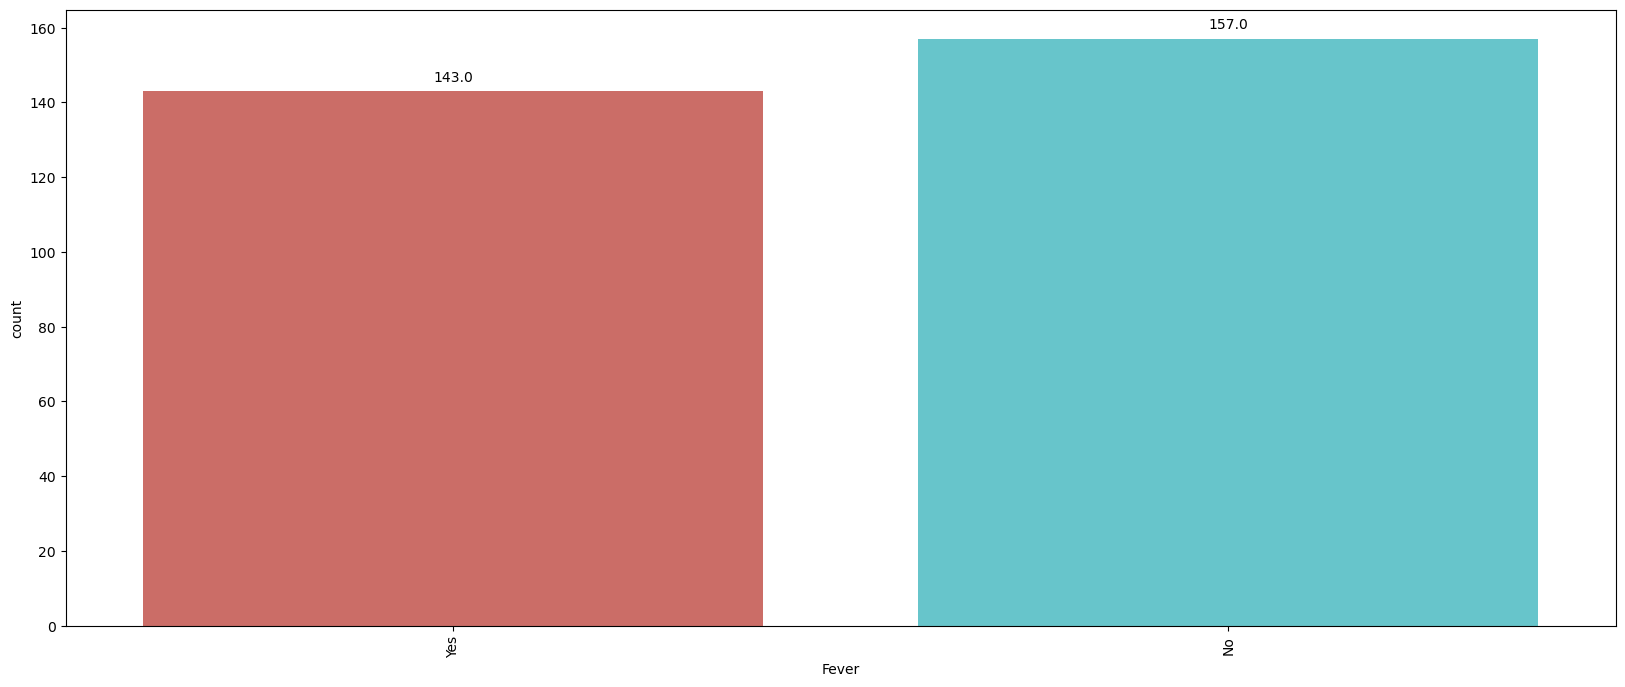

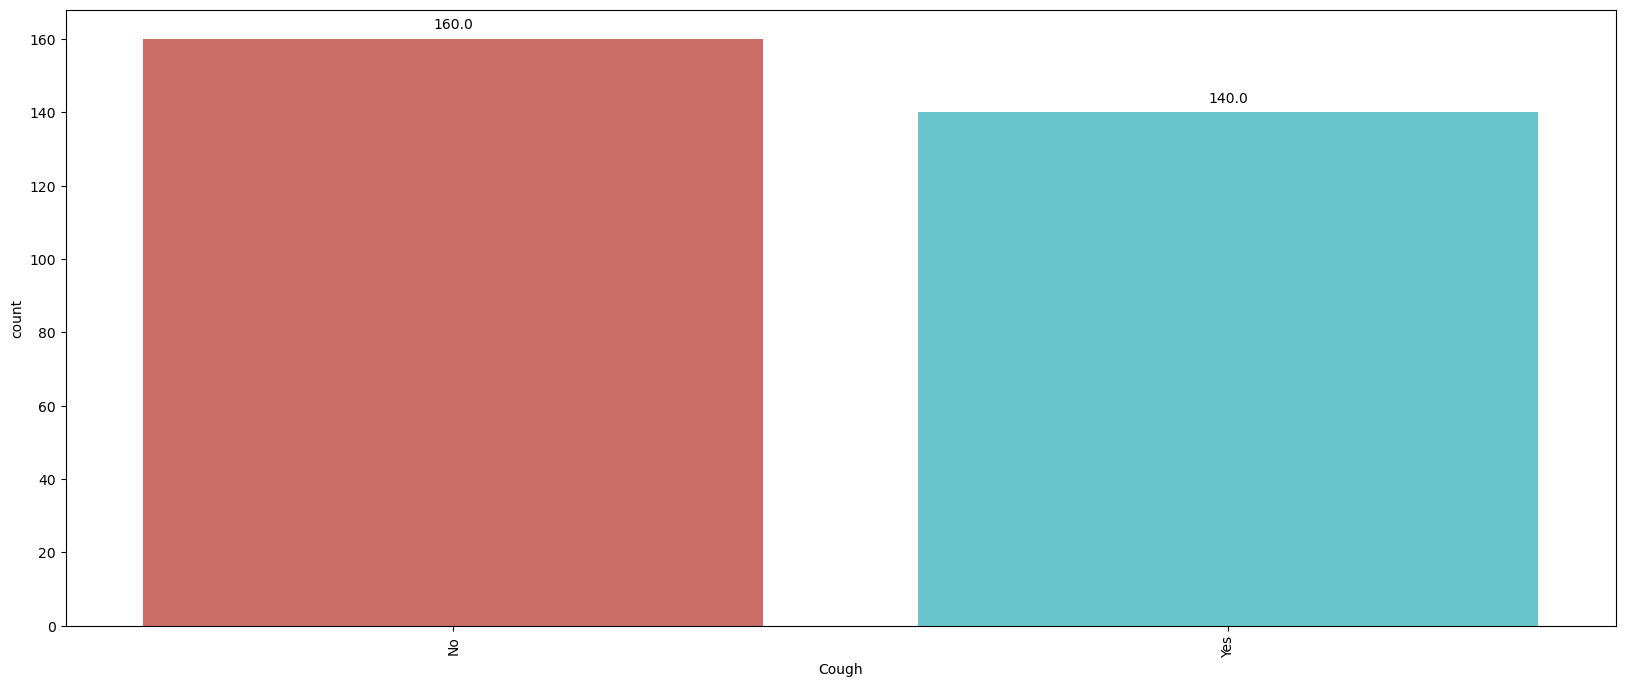

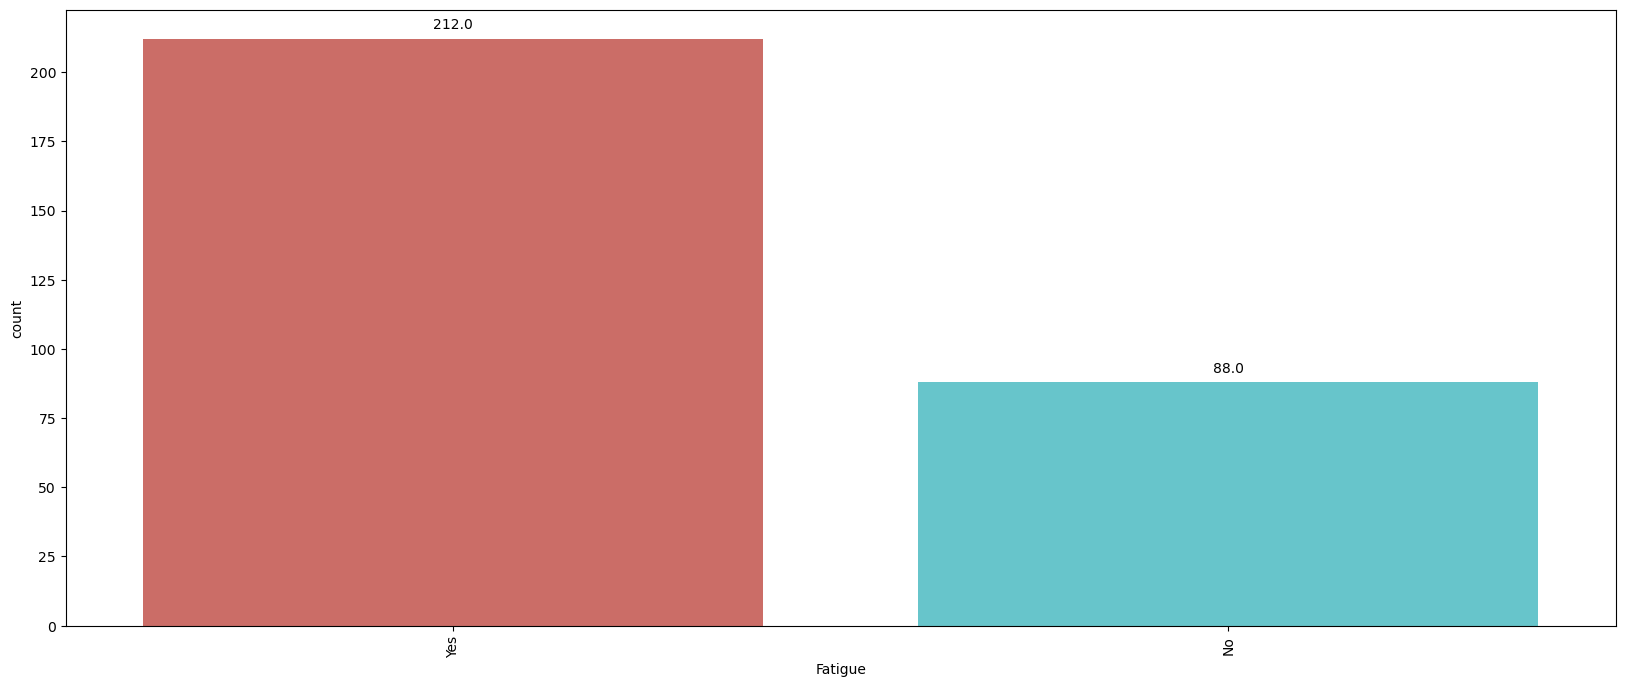

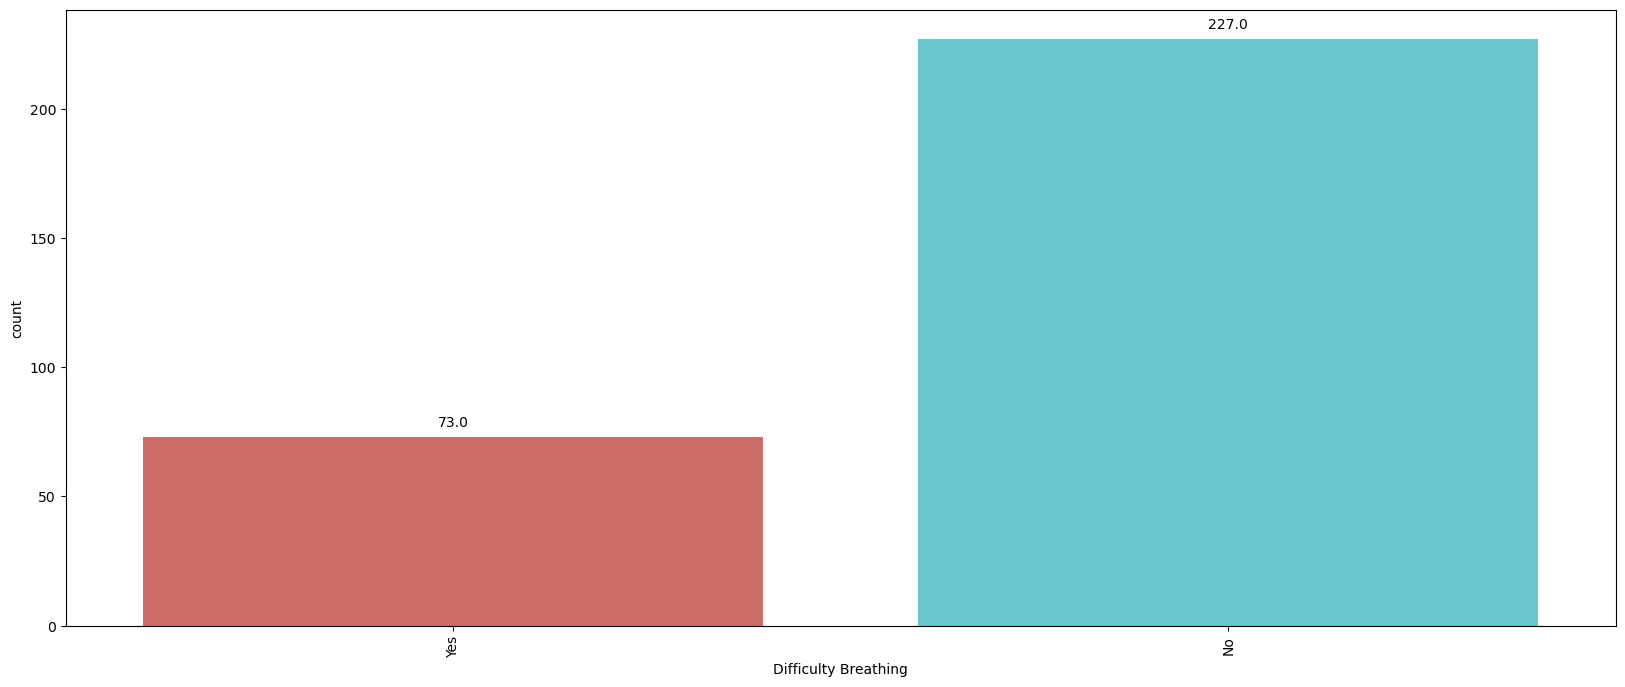

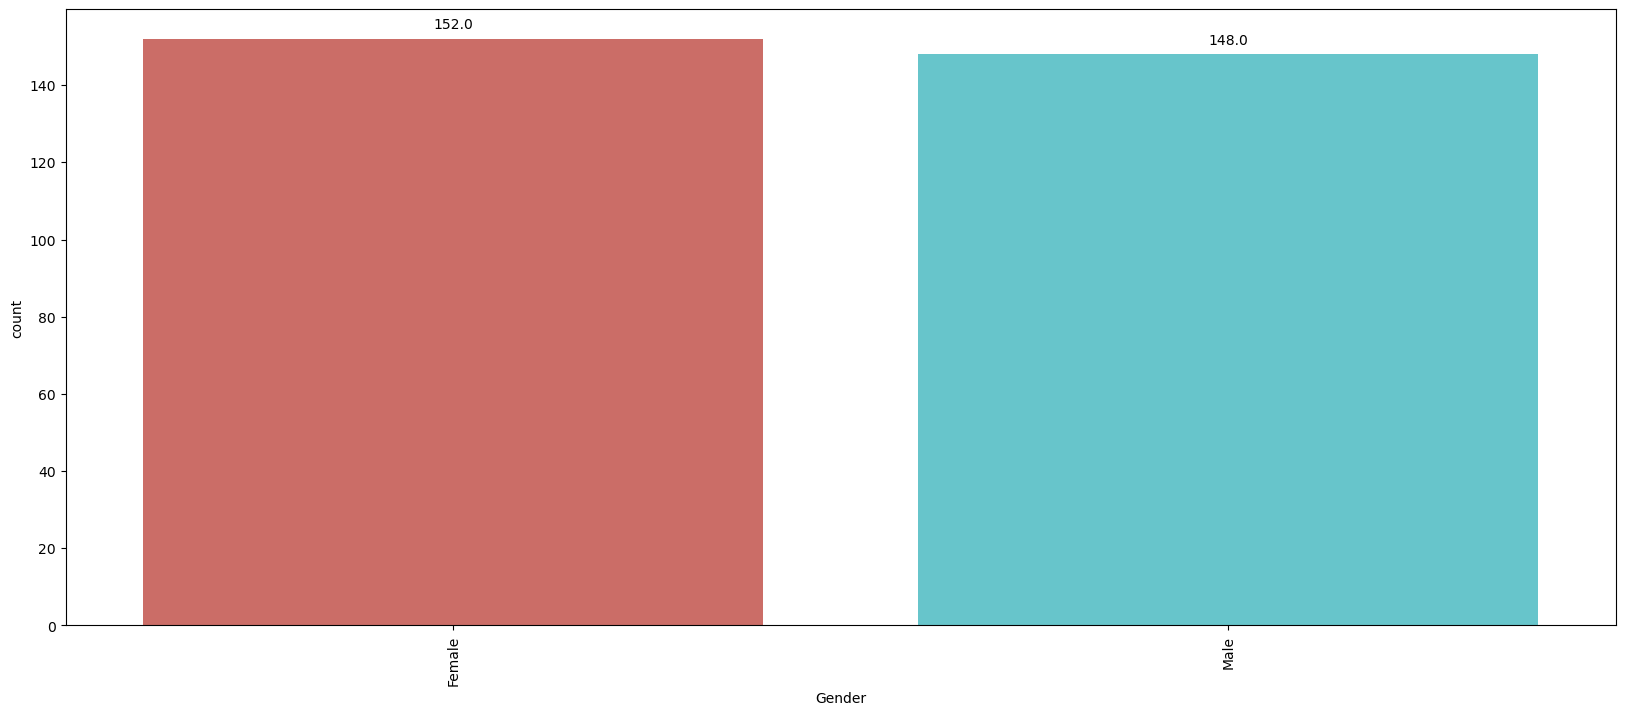

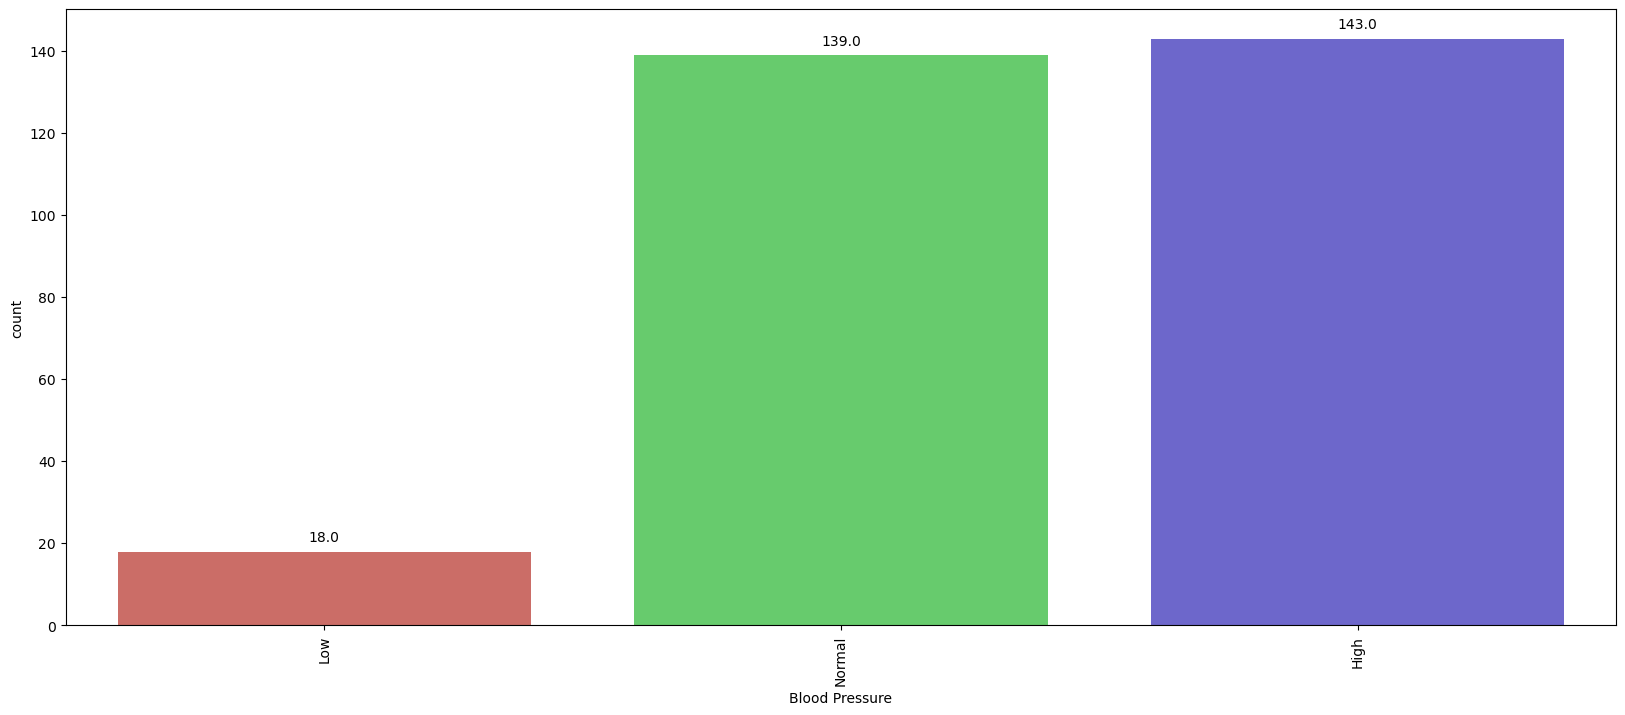

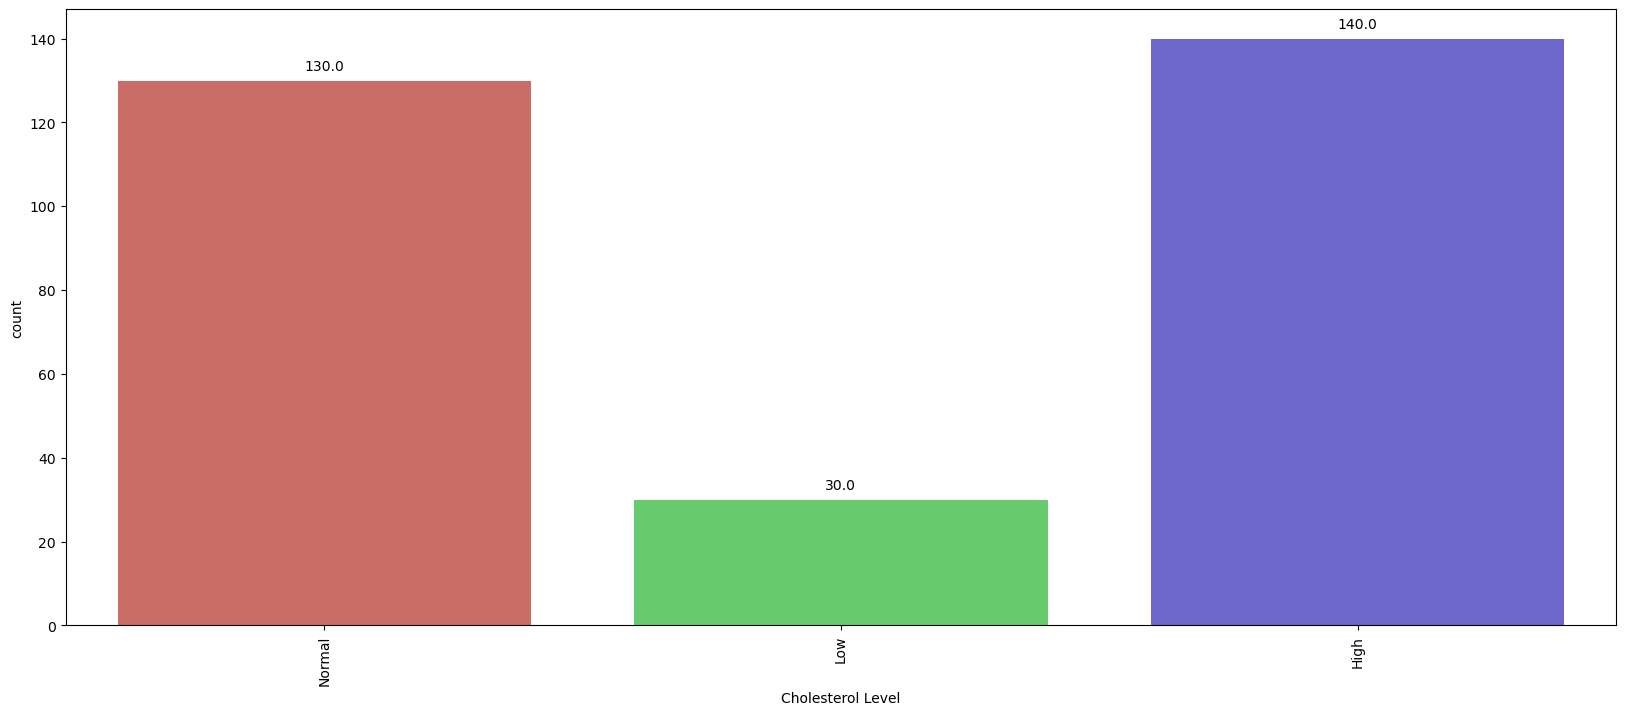

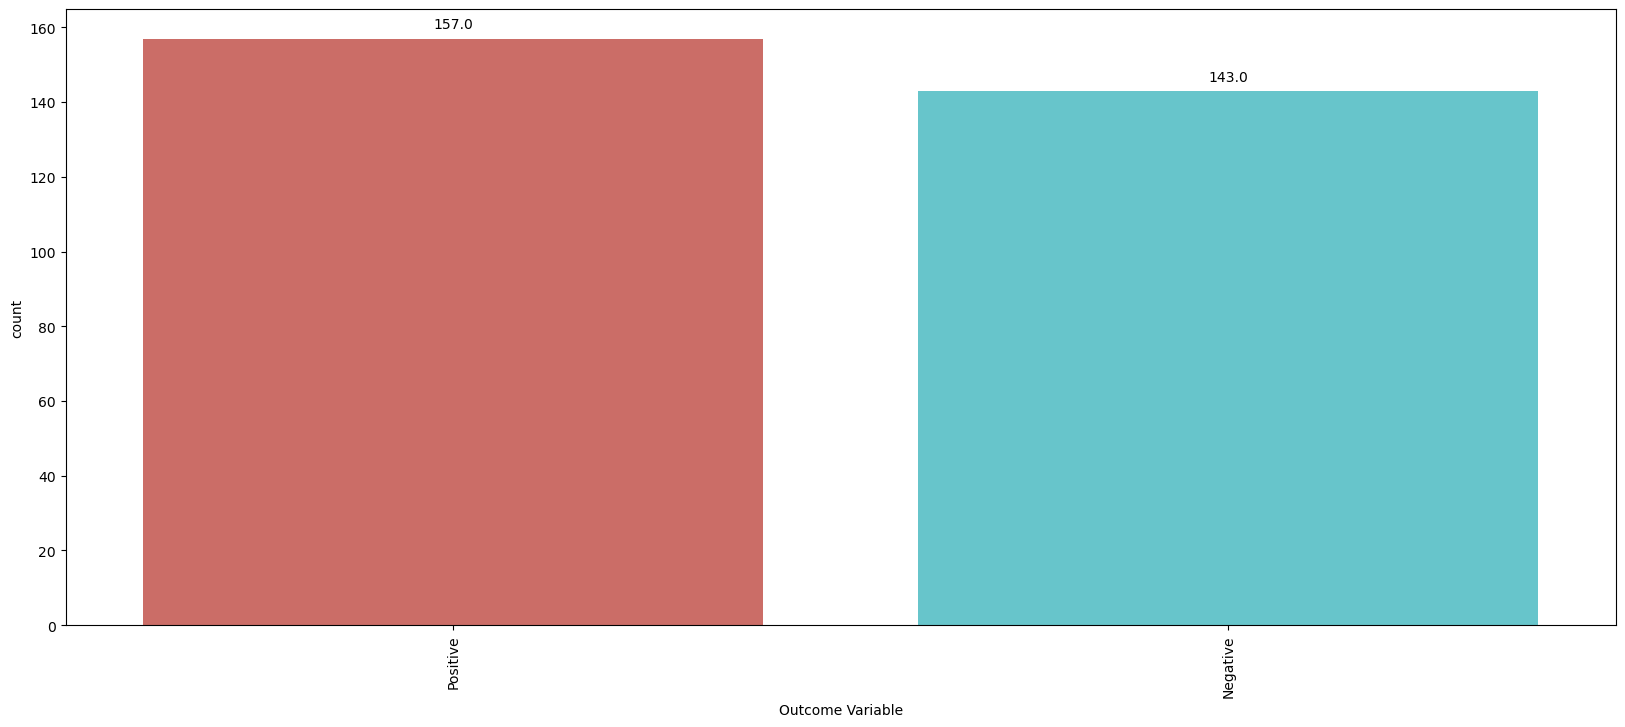

In [224]:
for i in categorical:
    plt.figure(figsize=(20, 8))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.xticks(rotation = 90)
    plt.show()

In [225]:
import plotly.express as px

for i in categorical:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()

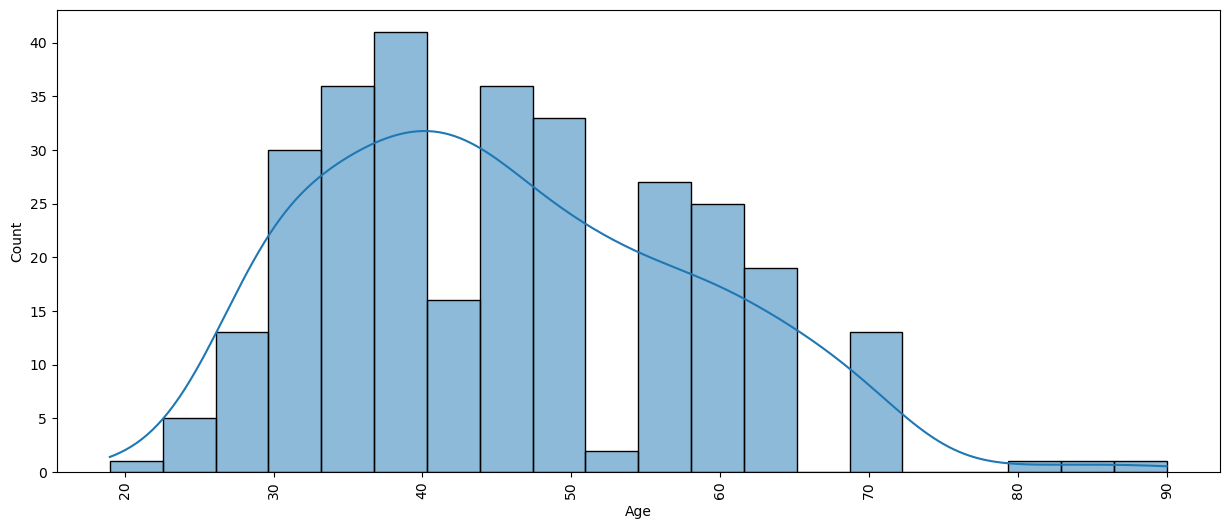

In [226]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

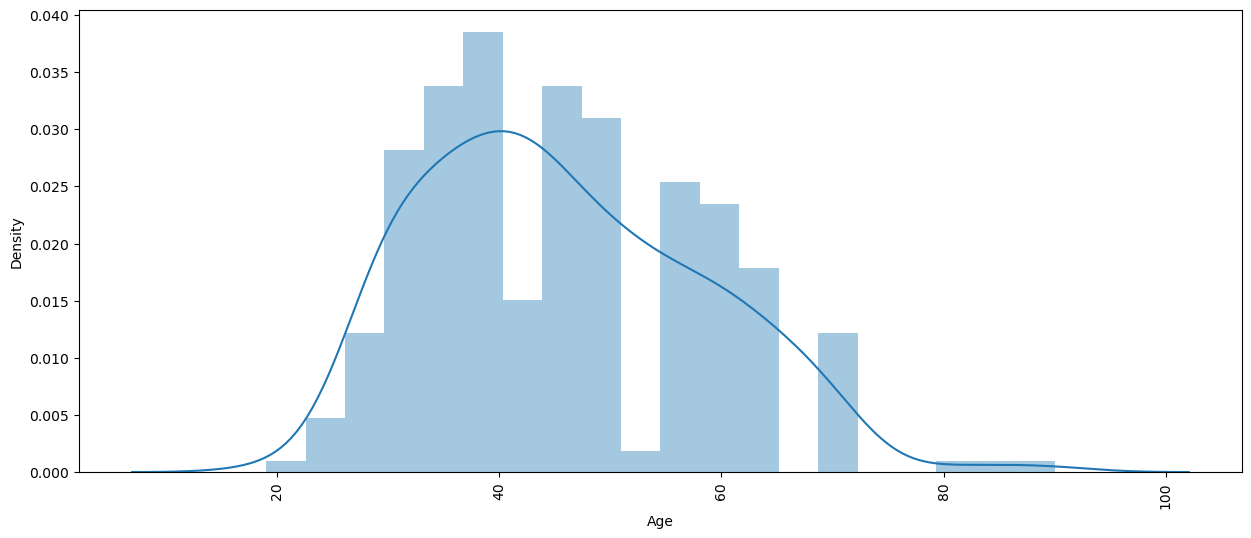

In [227]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.distplot(df[i], bins = 20, kde = True)
    plt.xticks(rotation = 90)
    plt.show()

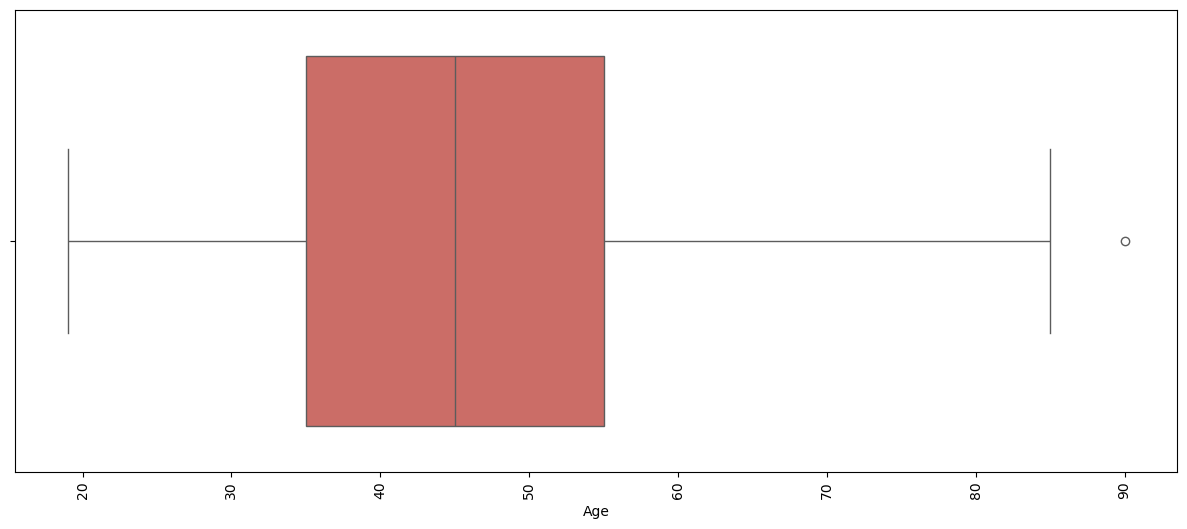

In [228]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

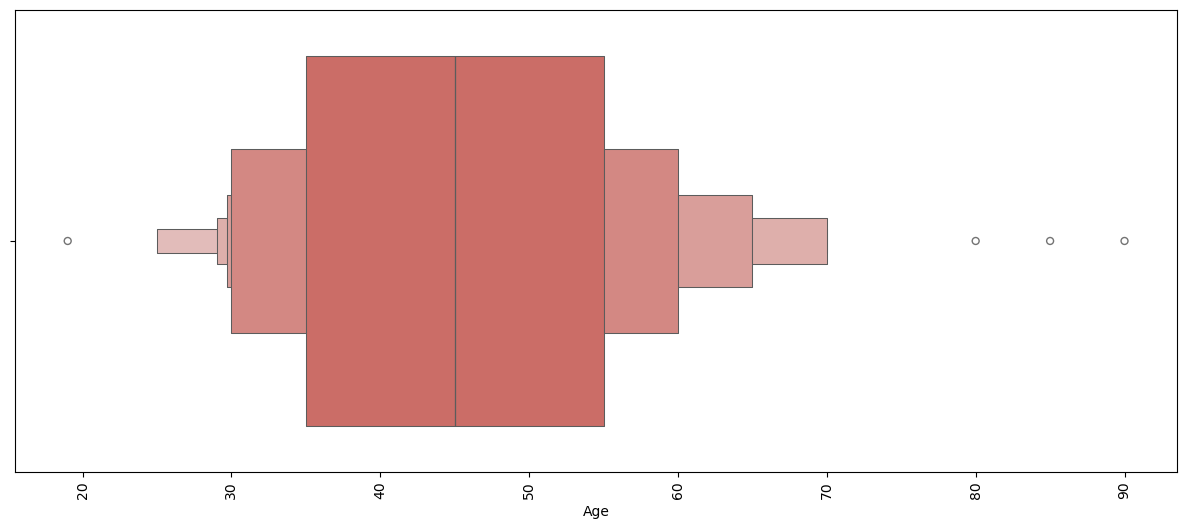

In [229]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxenplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

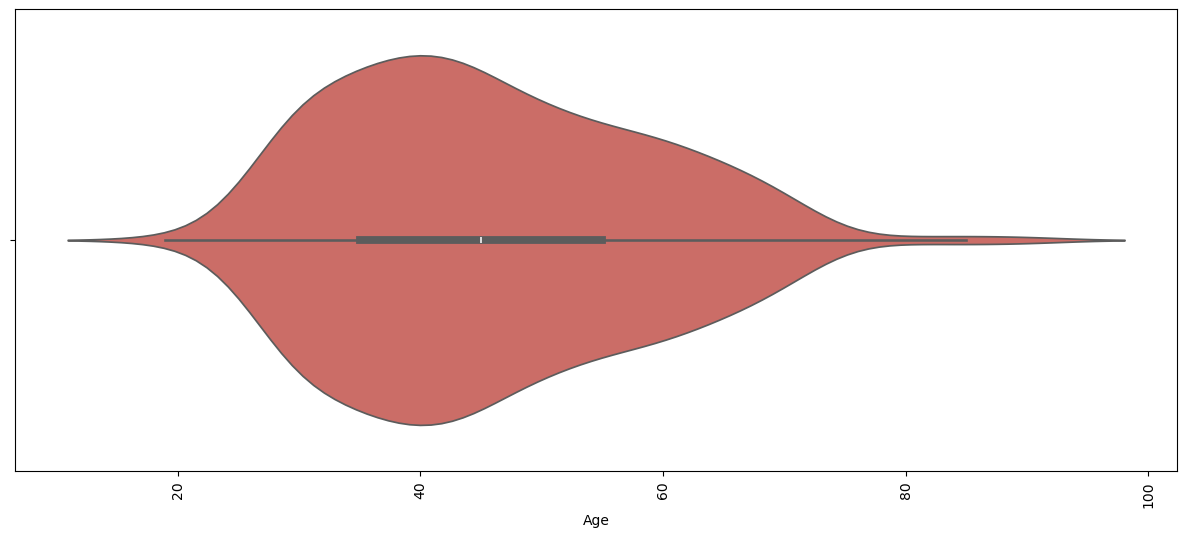

In [230]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.violinplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.show()

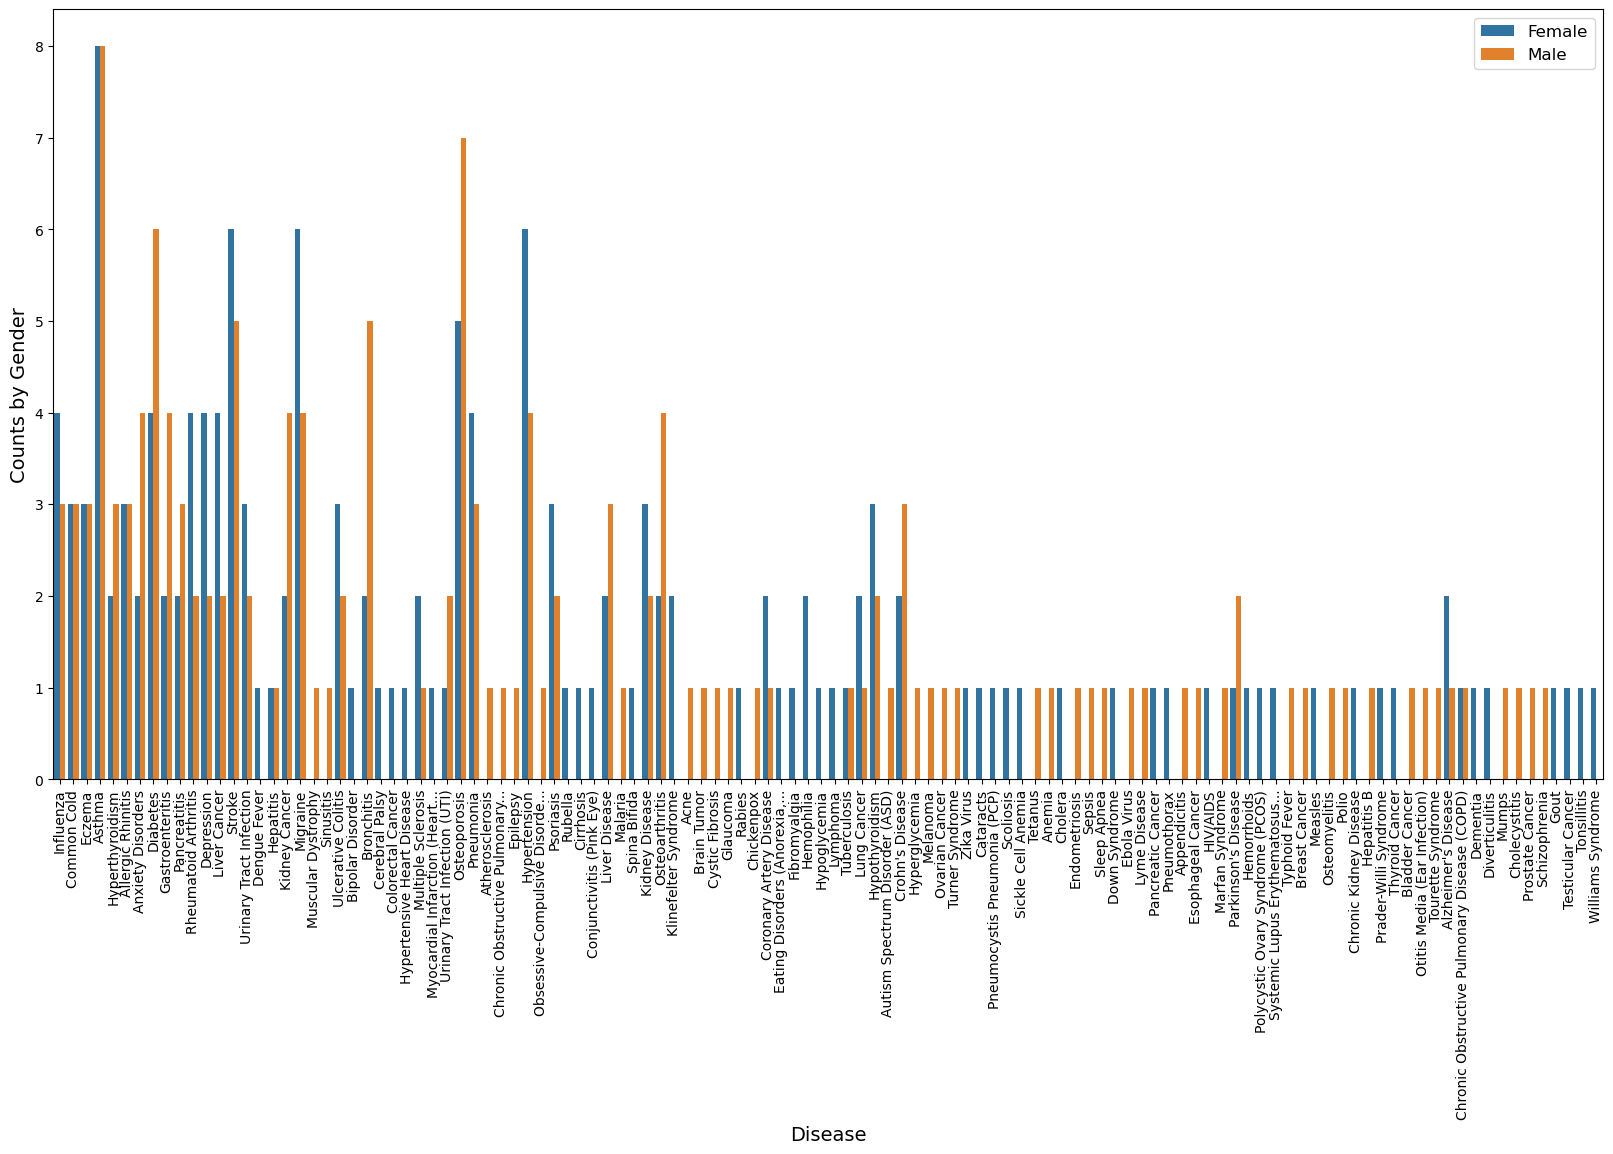

In [231]:
plt.figure(figsize=(20,10))
sns.countplot(x = df['Disease'],hue = df['Gender'])
plt.xticks(rotation=90,fontsize=10)
plt.xlabel('Disease', fontsize=14)
plt.ylabel('Counts by Gender', fontsize=14)
plt.legend(fontsize=12)
plt.show()

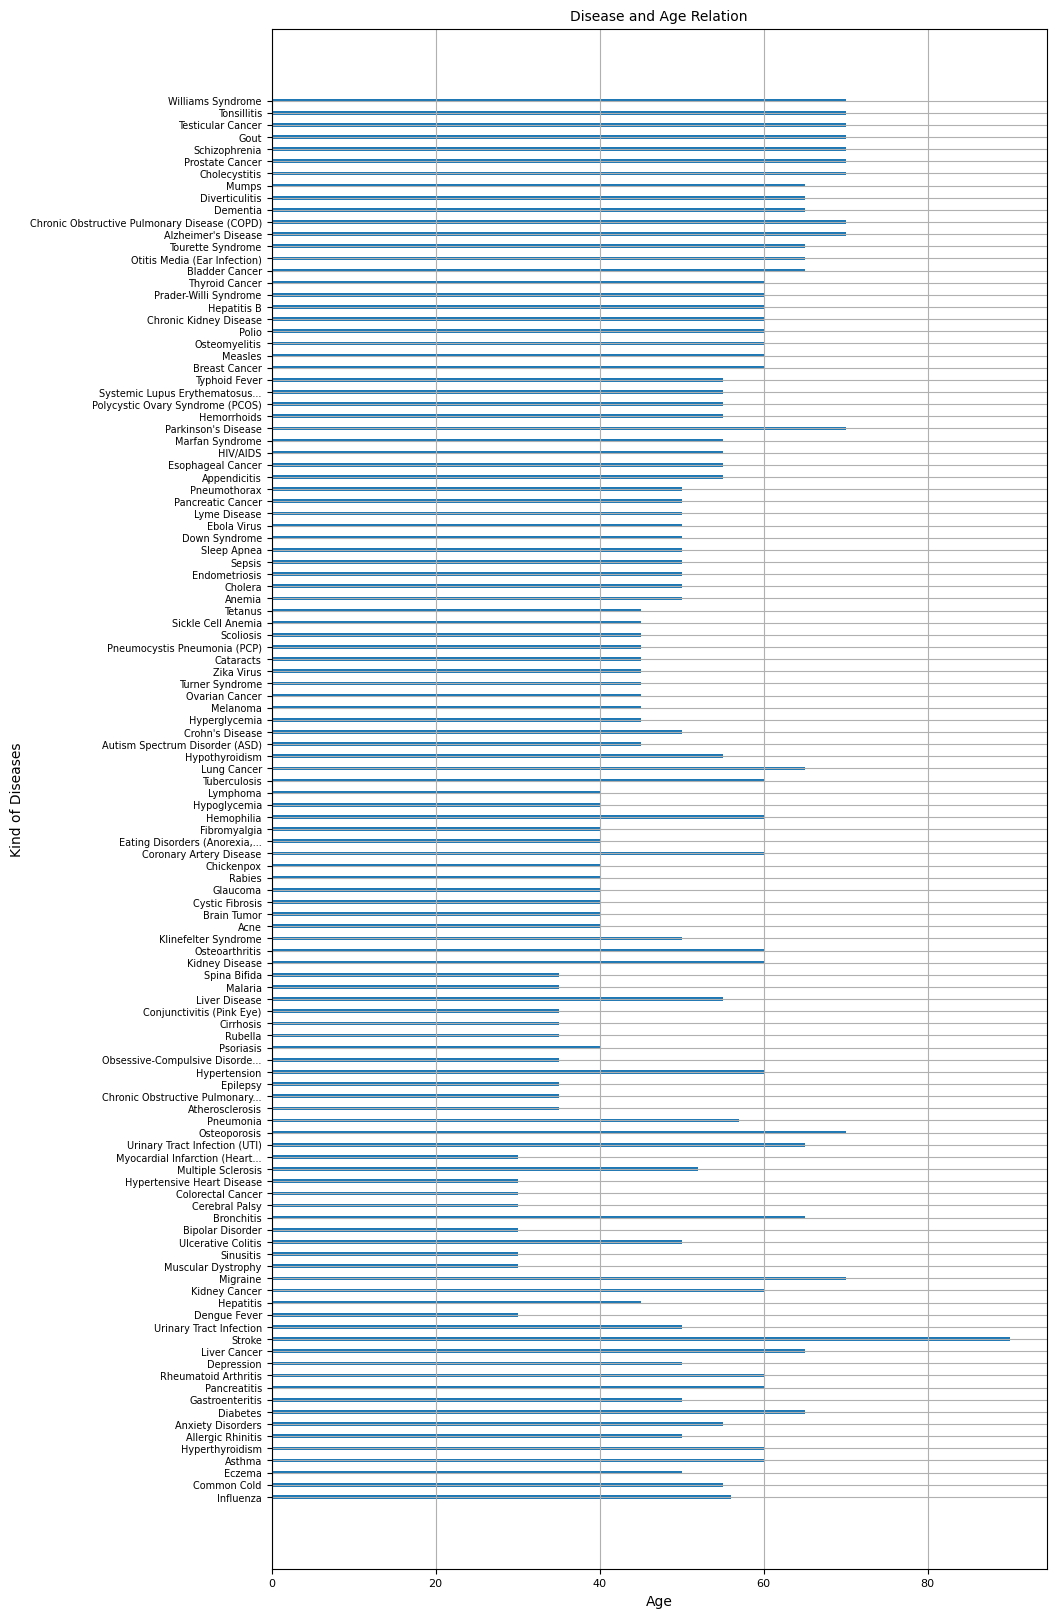

In [232]:
plt.figure(figsize=(10, 20))
plt.barh(df['Disease'], df['Age'], height=0.3, align='center')
plt.xticks(fontsize=8)
plt.yticks(fontsize=7)
plt.xlabel('Age', fontsize=10)
plt.ylabel('Kind of Diseases', fontsize=10)
plt.title('Disease and Age Relation', fontsize=10)
plt.grid()
plt.show()

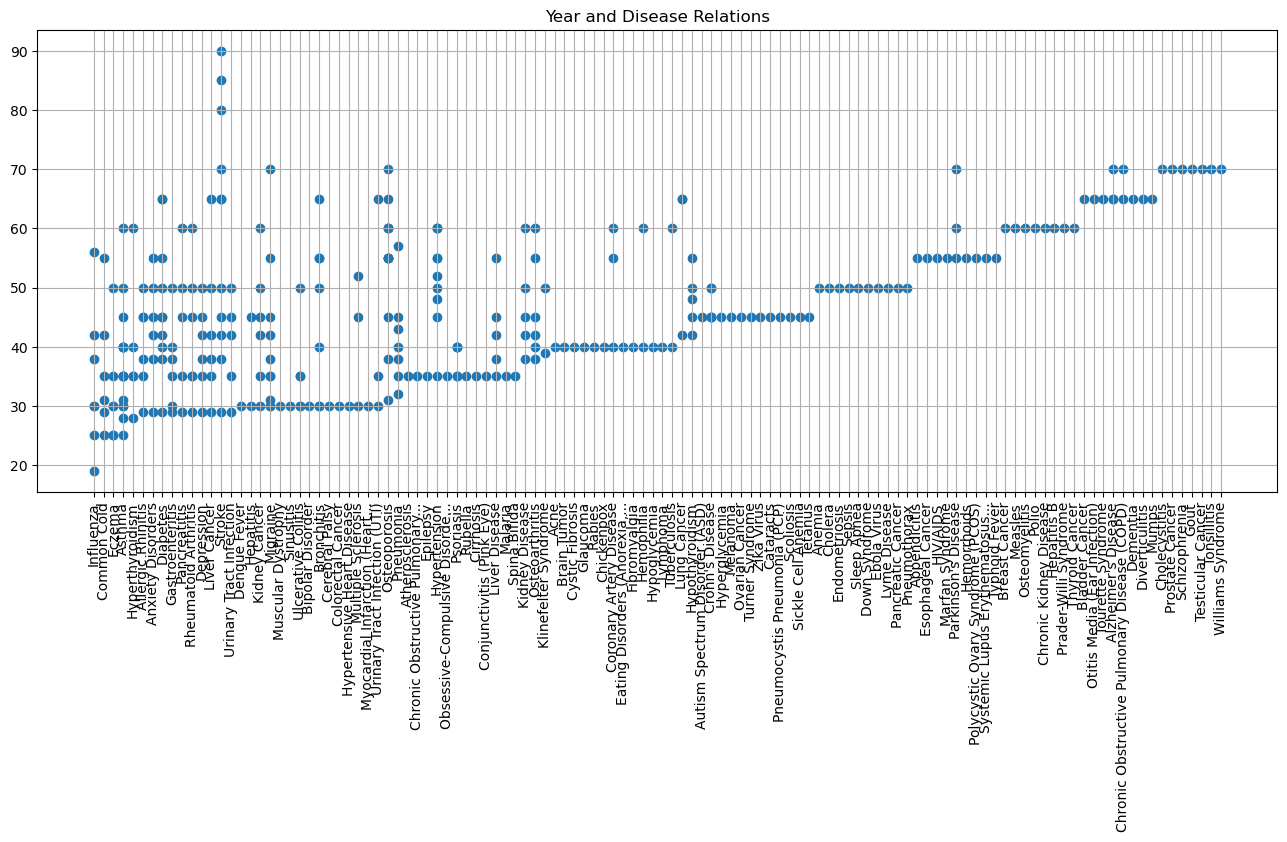

In [233]:
plt.figure(figsize=(16,6))
plt.scatter(df['Disease'],df['Age'])
plt.xticks(rotation=90)
plt.title('Year and Disease Relations')
plt.grid()
plt.show()

In [234]:
pivot_table = df.pivot_table(index=['Disease','Outcome Variable','Gender'], values=['Age'], aggfunc=['mean', 'count'])
print(pivot_table)

                                                       mean count
                                                        Age   Age
Disease                       Outcome Variable Gender            
Acne                          Negative         Male    40.0     1
Allergic Rhinitis             Negative         Female  34.0     3
                                               Male    47.5     2
                              Positive         Male    45.0     1
Alzheimer's Disease           Negative         Female  70.0     1
...                                                     ...   ...
Urinary Tract Infection       Positive         Male    29.0     1
Urinary Tract Infection (UTI) Negative         Male    50.0     2
                              Positive         Female  30.0     1
Williams Syndrome             Positive         Female  70.0     1
Zika Virus                    Negative         Female  45.0     1

[201 rows x 2 columns]


In [235]:
one_hot_features = ['Fever', 'Cough', 'Fatigue', 'Difficulty Breathing','Gender','Disease' ]
df = pd.get_dummies(df, columns=one_hot_features, drop_first=True)

In [236]:
from sklearn.preprocessing import LabelEncoder

In [237]:
label_encoder = LabelEncoder()
df['Outcome Variable'] = label_encoder.fit_transform(df['Outcome Variable'])
df['Blood Pressure'] = label_encoder.fit_transform(df['Blood Pressure'])
df['Cholesterol Level'] = label_encoder.fit_transform(df['Cholesterol Level'])

In [272]:
df

,Age,Blood Pressure,Cholesterol Level,Outcome Variable,Fever_Yes,Cough_Yes,Fatigue_Yes,Difficulty Breathing_Yes,Gender_Male,Disease_Allergic Rhinitis,...,Disease_Tonsillitis,Disease_Tourette Syndrome,Disease_Tuberculosis,Disease_Turner Syndrome,Disease_Typhoid Fever,Disease_Ulcerative Colitis,Disease_Urinary Tract Infection,Disease_Urinary Tract Infection (UTI),Disease_Williams Syndrome,Disease_Zika Virus
0,19,1,2,1,True,False,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,25,2,2,0,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,25,2,2,0,False,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,25,2,2,1,True,True,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
5,25,2,2,1,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,70,0,0,1,True,True,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
342,70,2,2,1,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
343,80,0,0,1,True,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
345,85,0,0,1,True,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [274]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [276]:
X = df.drop(columns=['Outcome Variable'])
y = df['Outcome Variable']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [278]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [280]:
y_pred = model.predict(X_test)

In [282]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7166666666666667
              precision    recall  f1-score   support

           0       0.70      0.72      0.71        29
           1       0.73      0.71      0.72        31

    accuracy                           0.72        60
   macro avg       0.72      0.72      0.72        60
weighted avg       0.72      0.72      0.72        60



In [284]:
from sklearn.tree import DecisionTreeClassifier

In [286]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [288]:
y_pred_dt = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy: {dt_accuracy}')
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6833333333333333
              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.68      0.74      0.71        31

    accuracy                           0.68        60
   macro avg       0.68      0.68      0.68        60
weighted avg       0.68      0.68      0.68        60



In [290]:
from sklearn.ensemble import RandomForestClassifier

In [292]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [294]:
y_pred_rf = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy}')
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7833333333333333
              precision    recall  f1-score   support

           0       0.83      0.69      0.75        29
           1       0.75      0.87      0.81        31

    accuracy                           0.78        60
   macro avg       0.79      0.78      0.78        60
weighted avg       0.79      0.78      0.78        60

